# Colormaps and Colorbars in Matplotlib

### What are Colormaps?

A **colormap** in Matplotlib is a range of colors used to represent numerical values visually. Instead of using a single color, we can map data values to different shades or gradients. This is extremely powerful for highlighting patterns, distributions, and intensities in data.

Matplotlib provides many built-in colormaps such as:

- **Sequential**: `Blues`, `Greens`, `Oranges` – good for ordered data like Sales growth.
- **Diverging**: `coolwarm`, `RdBu`, `seismic` – great for data with both positive and negative values (like Profit).
- **Categorical/Qualitative**: `tab10`, `Set3` – ideal for different categories like Product Category or Region.
- **Perceptually Uniform**: `viridis`, `plasma`, `cividis` – recommended for scientific plots, as they are readable for color-blind viewers.

### What are Colorbars?

A **colorbar** is a scale that shows how colors correspond to data values. It’s essential when you use colormaps, because it helps the reader interpret the meaning of colors.

In **AI/ML and Data Science**, colormaps and colorbars are used in:

- Heatmaps for correlation matrices.
- Loss landscapes in neural networks.
- Feature importance visualizations.
- Confusion matrices and clustering plots.

**Pyplot Example**
Profit Heatmap with Colormap

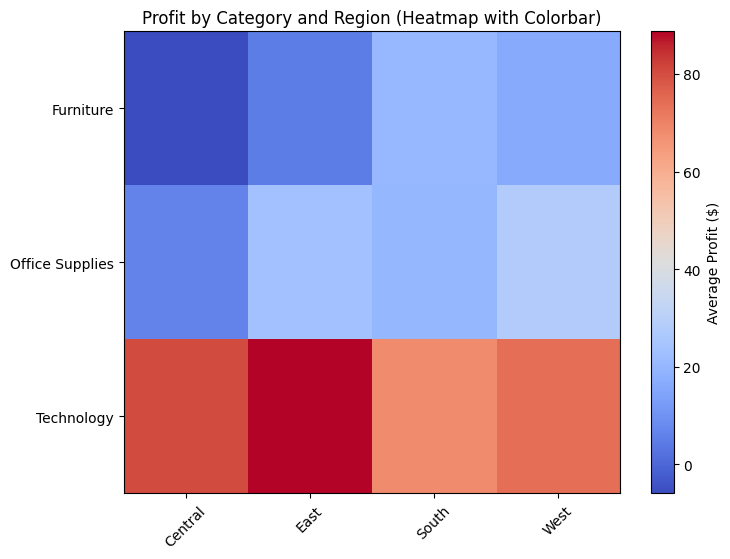

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/Superstore.csv", encoding='latin-1')
df_subset = df.pivot_table(values="Profit", index="Category", columns="Region", aggfunc="mean")

plt.figure(figsize=(8,6))
plt.imshow(df_subset, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Average Profit ($)")
plt.title("Profit by Category and Region (Heatmap with Colorbar)")
plt.xticks(range(len(df_subset.columns)), df_subset.columns, rotation=45)
plt.yticks(range(len(df_subset.index)), df_subset.index)
plt.show()

**OO Example**

Sales vs Profit Scatter with Colormap

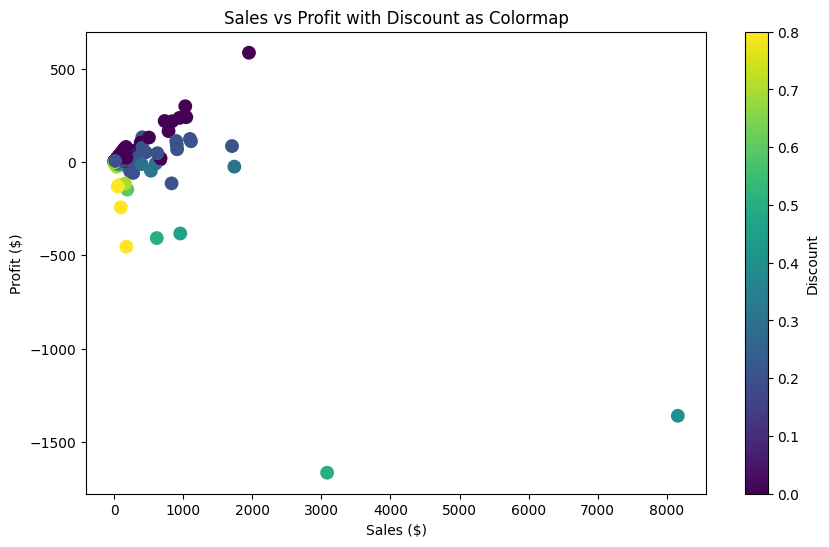

In [2]:
fig, ax = plt.subplots(figsize=(10,6))

df_subset = df.head(200)
sc = ax.scatter(df_subset["Sales"], df_subset["Profit"],
                c=df_subset["Discount"], cmap="viridis", s=80)

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label("Discount")

ax.set_title("Sales vs Profit with Discount as Colormap")
ax.set_xlabel("Sales ($)")
ax.set_ylabel("Profit ($)")
plt.show()

### Exercises

Q1. Create a heatmap of average Sales by Category and Region with a `Blues` colormap.

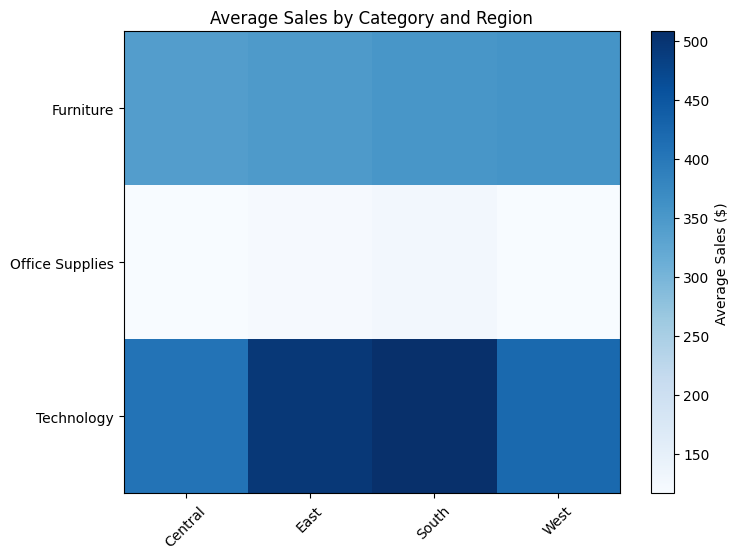

In [3]:
sales_pivot = df.pivot_table(values="Sales", index="Category", columns="Region", aggfunc="mean")

plt.figure(figsize=(8,6))
plt.imshow(sales_pivot, cmap="Blues", aspect="auto")
plt.colorbar(label="Average Sales ($)")
plt.title("Average Sales by Category and Region")
plt.xticks(range(len(sales_pivot.columns)), sales_pivot.columns, rotation=45)
plt.yticks(range(len(sales_pivot.index)), sales_pivot.index)
plt.show()

Q2. Create a scatter plot of Sales vs Profit where Discount is represented with a `plasma` colormap.

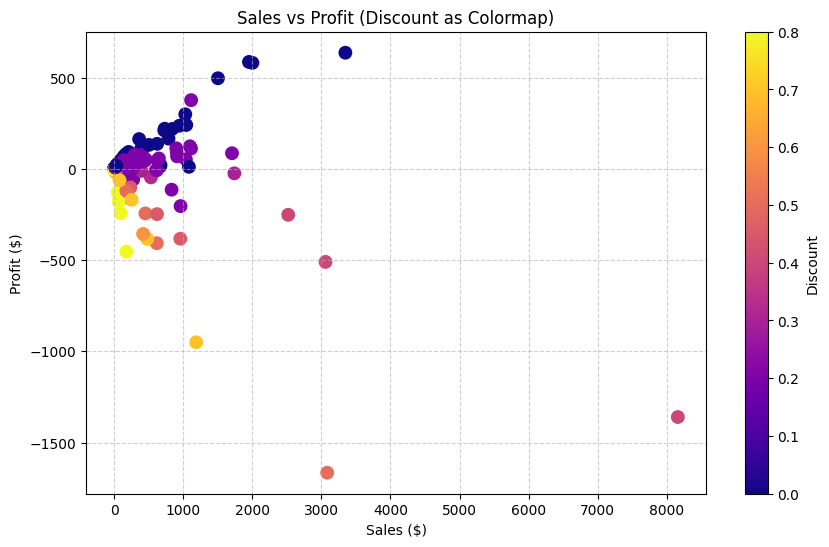

In [4]:
df_subset = df.head(300)

plt.figure(figsize=(10,6))
sc = plt.scatter(df_subset["Sales"], df_subset["Profit"],
                 c=df_subset["Discount"], cmap="plasma", s=80)

plt.colorbar(sc, label="Discount")
plt.title("Sales vs Profit (Discount as Colormap)")
plt.xlabel("Sales ($)")
plt.ylabel("Profit ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Q3. Use a diverging colormap (`seismic`) to plot average Profit by Sub-Category in a bar chart.

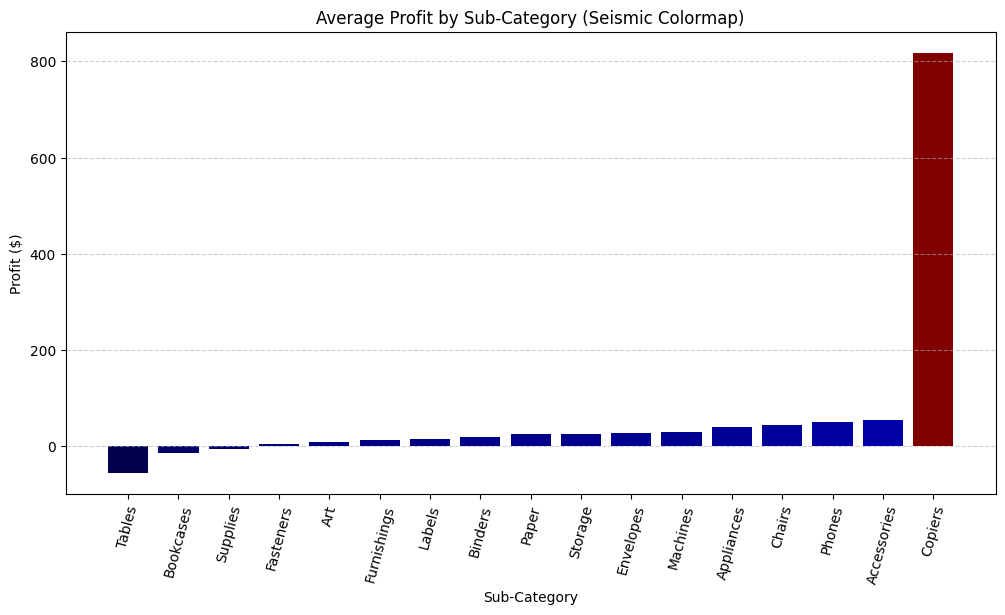

In [5]:
import numpy as np

subcat_profit = df.groupby("Sub-Category")["Profit"].mean().sort_values()

plt.figure(figsize=(12,6))
bars = plt.bar(subcat_profit.index, subcat_profit,
               color=plt.cm.seismic((subcat_profit - subcat_profit.min()) /
                                    (subcat_profit.max() - subcat_profit.min())))

plt.xticks(rotation=75)
plt.title("Average Profit by Sub-Category (Seismic Colormap)")
plt.xlabel("Sub-Category")
plt.ylabel("Profit ($)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Q4. Make a 2D histogram of Sales vs Quantity with a `viridis` colormap and add a colorbar.

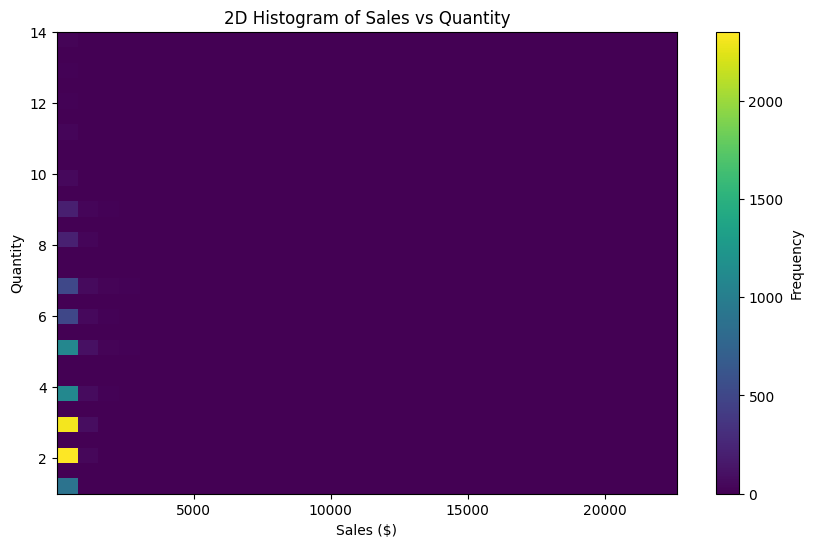

In [6]:
plt.figure(figsize=(10,6))
hb = plt.hist2d(df["Sales"], df["Quantity"], bins=30, cmap="viridis")
plt.colorbar(label="Frequency")

plt.title("2D Histogram of Sales vs Quantity")
plt.xlabel("Sales ($)")
plt.ylabel("Quantity")
plt.show()

Q5. Plot a line chart of cumulative Sales with a gradient colormap (`cool`) where color changes by index.

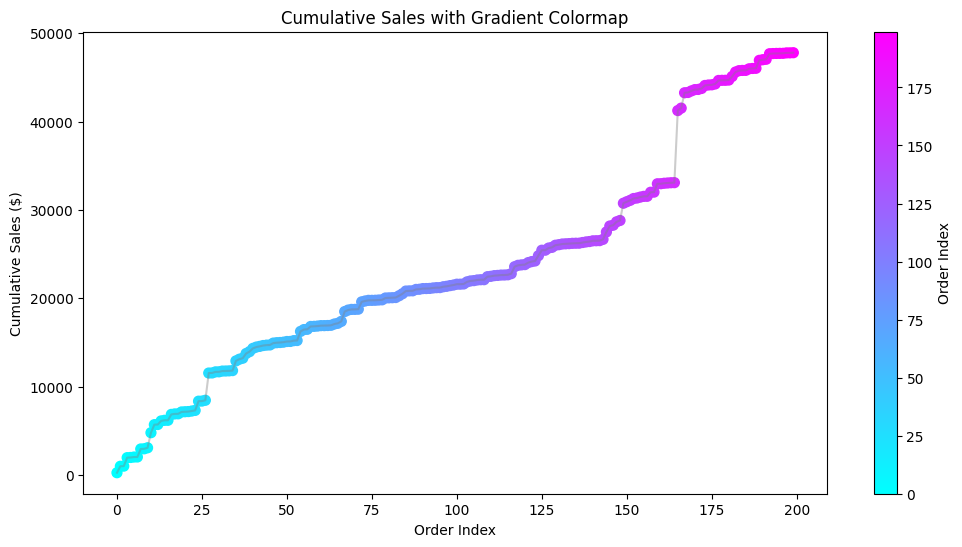

In [7]:
df_subset = df.head(200)
cumulative_sales = df_subset["Sales"].cumsum()

x = np.arange(len(cumulative_sales))
colors = plt.cm.cool(x / max(x))

plt.figure(figsize=(12,6))
plt.scatter(x, cumulative_sales, c=x, cmap="cool", s=50)
plt.plot(x, cumulative_sales, color="gray", alpha=0.4)

plt.colorbar(label="Order Index")
plt.title("Cumulative Sales with Gradient Colormap")
plt.xlabel("Order Index")
plt.ylabel("Cumulative Sales ($)")
plt.show()

### Summary

Colormaps transform plain plots into **informative visualizations** by encoding a third variable into color. Without them, scatter plots or heatmaps may only show shape and size; with them, they reveal **patterns, anomalies, and relationships**.

Colorbars are crucial companions that explain the meaning of colors, making visualizations scientifically valid and presentation-ready.

In the **Superstore dataset**, colormaps let us see:

- How **discount levels** affect profit in scatter plots.
- Which **regions** or categories perform better in heatmaps.
- How **sales distributions** vary with customer segments.

In AI/ML, colormaps are indispensable in **loss functions, feature maps, confusion matrices, and embeddings**. Correct use of colormaps ensures clarity, accessibility (for colorblind users), and better storytelling.